# Titanic Disaster

Not much information is known about the titanic disaster. This not infamous disaster happened on April 15th, 1912 after the ship collided with an iceberg during her journey. In this project we are going to discover the underlying traits fro the features that enable people to survive the crash. Among the people survived there were kids, women, and men. We also discover what genger, age group survived the most and the underlying reasoning behind it. 

In [511]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

### Read Training and Test Data

In [512]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Exploratory Data Analysis

Training and Test data have been copied to new variables to avoid the accidental data change. 

In [513]:
train_e = train.copy()
test_e = test.copy()

Data Dive and quick look at the features

In [514]:
train_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Passenger ID doesn't make any difference to the data training. Therefore we plan to drop it. Separating out numerical and cateogorical features.  

In [515]:
train_e.drop(columns='PassengerId', axis=1, inplace=True)
test_e.drop(columns='PassengerId', axis=1, inplace=True)

In [516]:
NUMERICAL_FEATURES =  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']  
CATEGORICAL_FEATURES = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
TARGET = ['Survived']

There are five numerical and five categorical features and survived as the target variable. 

Taking a look at the data where the target variable has been removed from the test data.

In [517]:
test_e.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [518]:
train_e.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Rearranging the Columns by moving the target variable to the end

In [519]:
train_e = train_e[NUMERICAL_FEATURES + CATEGORICAL_FEATURES + TARGET]

Quick look on statistics of the numerical data

In [520]:
train_e[NUMERICAL_FEATURES].describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [521]:
test_e[NUMERICAL_FEATURES].describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


Quick dive into the categorical features

In [522]:
train_e[CATEGORICAL_FEATURES].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Canavan, Miss. Mary",male,1601,B96 B98,S
freq,1,577,7,4,644


Findings:

* There are 891 records in the training data set.
* Age has only 714 values out of 891. 
* The range of age was from toddler to 80 year old. 
* Majority of the sample was in Pclass 3.
* There were a few people beyond the age of 38. 
* Majority of the family is a small family only a few family had more than one sibling. 
* Number of parents/children on were mostly 0 only a few family had 6 parents/children. 
* The fare varied form the range of 0 to $513. Most of the people paid less than 31 dollars.
* The names are unique all across, which means no two people had the same name. 
* There was no ambiguity in entering the data for Sex because there are only two types of values. 
* Cabin has similar information across many of their enteries this is due to the fact that a ship can have many cabins. 
* Embarked has 3 values which means that there are three stops from where people embarked. The value 'S' tops the world. 
* Out of 13 features in the training dataset. We have 6 integer values, 2 float data types, and 5 string data types

Checking the shape of the dataset

In [523]:
print ("There are {} observation and {} columns in training dataset".format(train_e.shape[0], train_e.shape[1]))
print ("There are {} observation and {} columns in test dataset".format(test_e.shape[0], test_e.shape[1]))

There are 891 observation and 11 columns in training dataset
There are 418 observation and 10 columns in test dataset


Finding the missing columns:

In [524]:
pd.DataFrame(train_e.isnull().sum(), columns= ['No. of missing values']).T

,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked,Survived
No. of missing values,0,177,0,0,0,0,0,0,687,2,0


Age has 177 missing records wehreas Cabin has 687 missing records which is significant portion of the dataset. Embarked has only 2 missing values which is not that much. 

In [525]:
pd.DataFrame(test_e.isnull().sum(), columns= ['No. of missing values']).T

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
No. of missing values,0,0,0,86,0,0,0,1,327,0


Age has 86 missing records wehreas Cabin has 327 missing records, which is significant portion of the dataset. This similar kind of pattern was noticed in the training dataset as well.

#### Family Name 
Created a new feature Family value to distinguish people who belong to the same family. 

In [526]:
train_e['FamilyName'] = train_e['Name'].str.split(",",expand=True)[0]
test_e['FamilyName'] = test_e['Name'].str.split(",",expand=True)[0]

In [527]:
(train_e.FamilyName.value_counts() > 1).sum()

133

There are 133 family with more than one member on board.

In [528]:
cabin_yes = list(train_e[train_e['Cabin'].isnull() == False]['FamilyName'])
cabin_no = list(train_e[train_e['Cabin'].isnull() == True]['FamilyName'])

In [529]:
len(list(set(cabin_no) - set(cabin_yes))) 

509

There are 509 Family Name does not have any clue about their cabin allocations. Cabin does not look significant feature. Hence carrying forward our analysis with this much of missing information does not make any sense. This analysis is based on the assumption that people from the same family would share the same cabin information. The ticket number would be differnt but cabin information would definitely be same. Therefore, we plan to drop cabin from training as well as test data.

In [530]:
train_e.drop('Cabin', axis=1, inplace=True)
test_e.drop('Cabin', axis=1, inplace=True)

#### Survival by Age

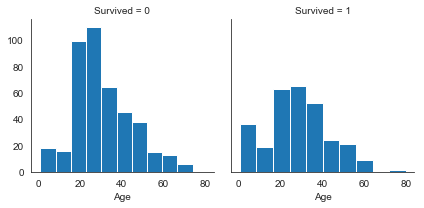

In [531]:
plot = sns.FacetGrid(train_e, col = 'Survived')
plot.map(plt.hist, 'Age', bins = 10)
plt.show()

Looking at the age data we can say that although most of the passengers are in their 15-40 age range but those are the ones that didn't survive. Mostly the people who survived are in the age range of 0-10 and elderly people. 

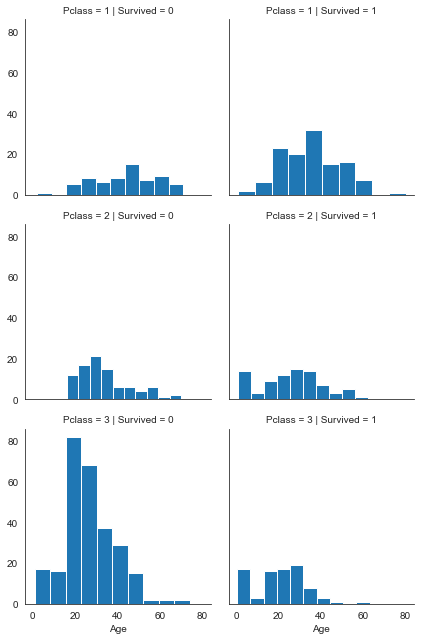

In [532]:
grid = sns.FacetGrid(train_e, row='Pclass', col='Survived')
grid.map(plt.hist, 'Age', bins =10)
plt.show()

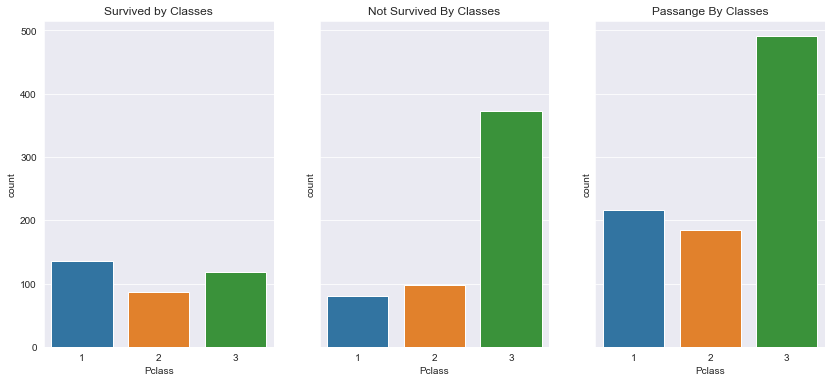

In [533]:
sns.set_style("darkgrid")
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(14,6))
sns.countplot(data = train_e[train_e.Survived > 0], x = "Pclass",ax=ax1)
ax1.set_title('Survived by Classes')
sns.countplot(data = train_e[train_e.Survived == 0], x = "Pclass",ax=ax2)
ax2.set_title('Not Survived By Classes')
sns.countplot(data = train_e, x = "Pclass",ax=ax3)
ax3.set_title('Passange By Classes')
plt.show()

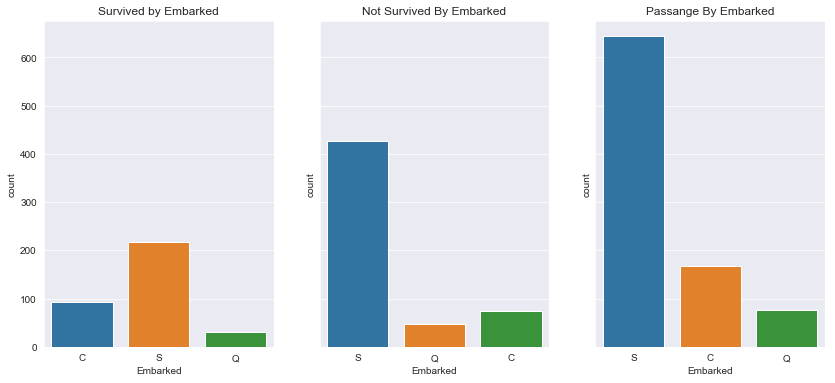

In [534]:
sns.set_style("darkgrid")
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(14,6))
sns.countplot(data = train_e[train_e.Survived > 0], x = "Embarked",ax=ax1)
ax1.set_title('Survived by Embarked')
sns.countplot(data = train_e[train_e.Survived == 0], x = "Embarked",ax=ax2)
ax2.set_title('Not Survived By Embarked')
sns.countplot(data = train_e, x = "Embarked",ax=ax3)
ax3.set_title('Passange By Embarked')
plt.show()

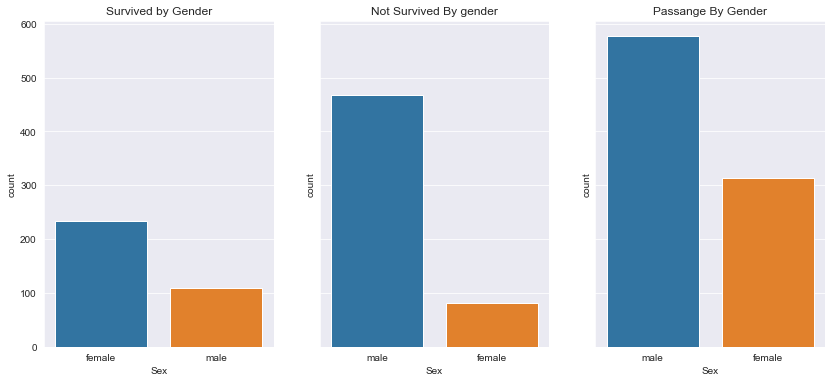

In [535]:
sns.set_style("darkgrid")
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(14,6))
sns.countplot(data = train_e[train_e.Survived > 0], x = "Sex",ax=ax1)
ax1.set_title('Survived by Gender')
sns.countplot(data = train_e[train_e.Survived == 0], x = "Sex",ax=ax2)
ax2.set_title('Not Survived By gender')
sns.countplot(data = train_e, x = "Sex",ax=ax3)
ax3.set_title('Passange By Gender')
plt.show()

From the data visualization above we can see that although Pclass 1 had the lowest numbe of people but those are the ones that survived the most. Pclass3 had most number of people but they had the least chance of survival. 

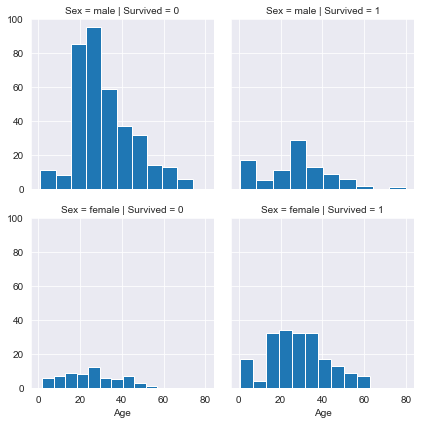

In [536]:
grid = sns.FacetGrid(train_e, row='Sex', col='Survived')
grid.map(plt.hist, 'Age', bins =10)

From the data above we can see that females had a higher change of surival as compared to the males. 

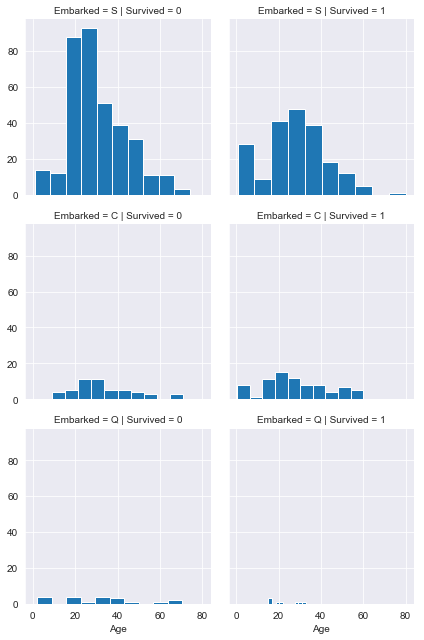

In [537]:
grid = sns.FacetGrid(train_e, row='Embarked', col='Survived')
grid.map(plt.hist, 'Age', bins =10)

The data visualization above tells us that although most of the people embarked from C they didn't have as much as high chance of survival as compared to Embarked class Q. 

In [538]:
train_e[train_e['Embarked'].isnull() == True]

,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked,Survived,FamilyName
61,1,38.0,0,0,80.0,"Icard, Miss. Amelie",female,113572,NaN,1,Icard
829,1,62.0,0,0,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,113572,NaN,1,Stone


Lets check other members of Icard and Stone family because these two are the only family that are missing Embarked values. 

In [539]:
train_e[(train_e['FamilyName'].isin(['Icard','Stone']) == True) & (train_e['Embarked'].isnull() == False)].shape[0]

0

There is no other family members from Icard and Stone. Therefore, we decide to populate it with majority class. 'S' is the Embarked where most of the people boarded. Hence populatiing missing Embarked info with 'S'

In [540]:
train_e['Embarked'].fillna('S',inplace = True)
test_e['Embarked'].fillna('S',inplace = True)

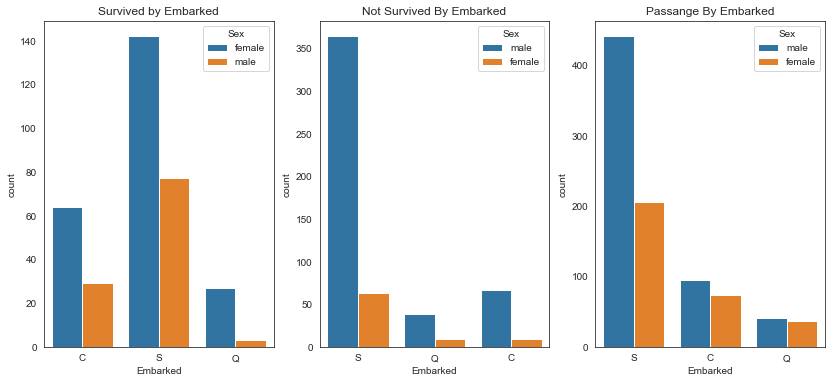

In [541]:
sns.set_style("white")
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,6))
sns.countplot(data = train_e[train_e.Survived > 0], x = "Embarked",ax=ax1,hue="Sex")
ax1.set_title('Survived by Embarked')
sns.countplot(data = train_e[train_e.Survived == 0], x = "Embarked",ax=ax2,hue="Sex")
ax2.set_title('Not Survived By Embarked')
sns.countplot(data = train_e, x = "Embarked",ax=ax3,hue="Sex")
ax3.set_title('Passange By Embarked')
plt.show()

In [542]:
train_e['title'] = train_e['Name'].str.split(",",expand=True)[1].str.split(" ",expand=True)[1]
test_e['title'] = test['Name'].str.split(",",expand=True)[1].str.split(" ",expand=True)[1] 

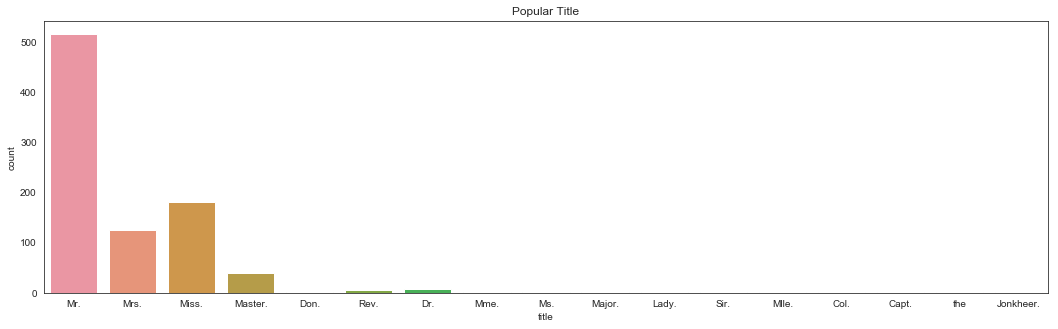

In [543]:
plt.figure(figsize=(18,5))
sns.set_style("white")
g =sns.countplot(data = train_e, x = "title")
g.set_title('Popular Title')
plt.show()

In [544]:
train_e.loc[train_e['title'].isin(['Capt.','Dr.','Rev.','Major.','Col.','the','Don.', 'Jonkheer.', 'Sir.', 'Lady.']), 'title'] = 'Spl.Prof'

In [545]:
train_e.loc[train_e['title'].isin(['Ms.','Mlle.']), 'title'] = 'Miss.'
train_e.loc[train_e['title'].isin(['Mme.']), 'title'] = 'Mrs.'

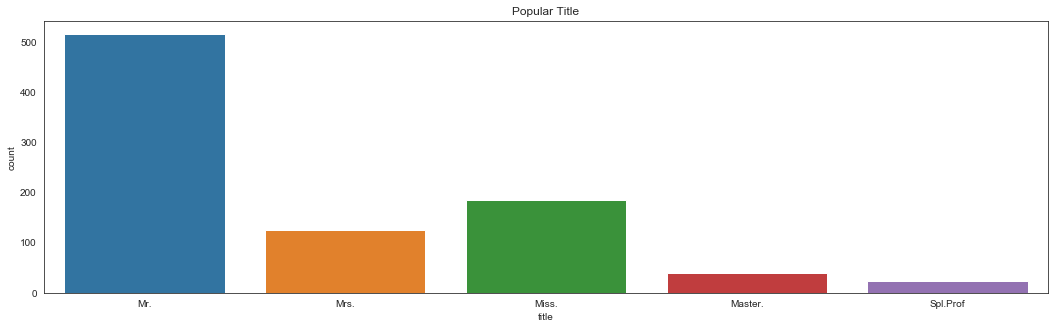

In [546]:
plt.figure(figsize=(18,5))
sns.set_style("white")
g =sns.countplot(data = train_e, x = "title")
g.set_title('Popular Title')
plt.show()

All the different titles have been grouped to form one or more new title therefore maximizing the inter class similarity. 

Since it is harder to deal with categorical variables for the tiles, we will change them to numerical form.  We will also do the same for the sex.

In [547]:
train_e[train_e.Age.isnull()]['title'].value_counts()

Mr.         119
Miss.        36
Mrs.         17
Master.       4
Spl.Prof      1
Name: title, dtype: int64

In [548]:
mr_mean_age = round(train_e[((train_e.title == 'Mr.') & ( train_e.Age != np.nan))]['Age'].mean())
miss_mean_age = round(train_e[((train_e.title == 'Miss.') & ( train_e.Age != np.nan))]['Age'].mean())
mrs_mean_age = round(train_e[((train_e.title == 'Mrs.') & ( train_e.Age != np.nan))]['Age'].mean())
master_mean_age = round(train_e[((train_e.title == 'Master.') & ( train_e.Age != np.nan))]['Age'].mean())
spl_mean_age = round(train_e[((train_e.title == 'Spl.Prof') & ( train_e.Age != np.nan))]['Age'].mean())

In [549]:
print(mr_mean_age,miss_mean_age,mrs_mean_age,master_mean_age,spl_mean_age)

32 22 36 5 46


In [550]:
train_e['Age'] = train_e.apply(
    lambda row: mr_mean_age if ((np.isnan(row['Age'])) & (row['title'] == 'Mr.')) else row['Age'], axis = 1)
train_e['Age'] = train_e.apply(
    lambda row: mrs_mean_age if ((np.isnan(row['Age'])) & (row['title'] == 'Mrs.')) else row['Age'], axis = 1)
train_e['Age'] = train_e.apply(
    lambda row: miss_mean_age if ((np.isnan(row['Age'])) & (row['title'] == 'Miss.')) else row['Age'], axis = 1)
train_e['Age'] = train_e.apply(
    lambda row: master_mean_age if ((np.isnan(row['Age'])) & (row['title'] == 'Master.')) else row['Age'], axis = 1)
train_e['Age'] = train_e.apply(
    lambda row: spl_mean_age if ((np.isnan(row['Age'])) & (row['title'] == 'Spl.Prof')) else row['Age'], axis = 1)

In [551]:
train_e.isnull().sum()
train_z = train_e.copy()

### Feature Engineering

##### Gender One Hot encoding

In [662]:
train_e = train_z.copy()

In [623]:
train_e['Sex'] = [1 if x == 'male' else 0 for x in train_e['Sex']]
#test_z['Sex'] = [1 if x == 'male' else 0 for x in test_e['Sex']]

In [624]:
train_e.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Name          0
Sex           0
Ticket        0
Embarked      0
Survived      0
FamilyName    0
title         0
dtype: int64

In [568]:
title = {"Spl.Prof": 1, "Mr.": 2, "Miss.": 3, "Mrs.": 4, "Master.": 5}
train_e['title'] = train_e['title'].map(title)


test_e['title'] = test_e['title'].map(title)
#test_e['title'] = test_e['title'].fillna(0)

In [569]:
Embarked_label = {"S": 1, "C": 2, "Q": 3}
train_e['Embarked'] = train_e['Embarked'].map(Embarked_label)
#train_e['Embarked'] = train_e['Embarked'].fillna(0)

test_e['Embarked'] = test_e['Embarked'].map(Embarked_label)
#test_e['Embarked'] = test_e['Embarked'].fillna(0)

In [570]:
train_e.head()

,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked,Survived,FamilyName,title
0,3,22.0,1,0,7.2500,"Braund, Mr. Owen Harris",1,A/5 21171,1,0,Braund,2
1,1,38.0,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,PC 17599,2,1,Cumings,4
2,3,26.0,0,0,7.9250,"Heikkinen, Miss. Laina",0,STON/O2. 3101282,1,1,Heikkinen,3
3,1,35.0,1,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,113803,1,1,Futrelle,4
4,3,35.0,0,0,8.0500,"Allen, Mr. William Henry",1,373450,1,0,Allen,2


In [571]:
test_e.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilyName,title
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Kelly,NaN
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Wilkes,NaN
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Myles,NaN
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,Wirz,NaN
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,Hirvonen,NaN


The way we decided to tackle the missing information of age is to fill in values with the median values of similar pclass and SibSp. We decided to choose those two features because from the coorelation table below we can see that Pclass and the SibSb have the largeset coorelation with the Age.  

In [663]:
train_Name = train_e.pop('Name')
train_ticket = train_e.pop('Ticket')
train_fare = train_e.pop('Fare')
train_FamilyName = train_e.pop('FamilyName')

In [664]:
train_e.head(10)

,Pclass,Age,SibSp,Parch,Sex,Embarked,Survived,title
0,3,22.0,1,0,male,S,0,Mr.
1,1,38.0,1,0,female,C,1,Mrs.
2,3,26.0,0,0,female,S,1,Miss.
3,1,35.0,1,0,female,S,1,Mrs.
4,3,35.0,0,0,male,S,0,Mr.
5,3,32.0,0,0,male,Q,0,Mr.
6,1,54.0,0,0,male,S,0,Mr.
7,3,2.0,3,1,male,S,0,Master.
8,3,27.0,0,2,female,S,1,Mrs.
9,2,14.0,1,0,female,C,1,Mrs.


In [665]:
train_e['family'] = train_e['SibSp'] + train_e['Parch']

In [666]:
train_e['family'] = train_e.apply(
    lambda row: 1 if (row['family'] > 0 ) else 0, axis = 1)

In [667]:
train_SibSp = train_e.pop('SibSp')
train_Parch = train_e.pop('Parch')

In [668]:
train_e.head()

,Pclass,Age,Sex,Embarked,Survived,title,family
0,3,22.0,male,S,0,Mr.,1
1,1,38.0,female,C,1,Mrs.,1
2,3,26.0,female,S,1,Miss.,0
3,1,35.0,female,S,1,Mrs.,1
4,3,35.0,male,S,0,Mr.,0


In [669]:
s = pd.Series(np.array([0, 5, 12, 18, 21, 30, 40, 50, 60, 70, 80]),
    index=['toddler','toddler','Young', 'Teen', 'Adult', '30s','40s','50s','60s','70s','80s'])

In [670]:
train_e['Age_Bucket'] = pd.cut(train_e['Age'],s)

In [671]:
train_e.head()

,Pclass,Age,Sex,Embarked,Survived,title,family,Age_Bucket
0,3,22.0,male,S,0,Mr.,1,"(21, 30]"
1,1,38.0,female,C,1,Mrs.,1,"(30, 40]"
2,3,26.0,female,S,1,Miss.,0,"(21, 30]"
3,1,35.0,female,S,1,Mrs.,1,"(30, 40]"
4,3,35.0,male,S,0,Mr.,0,"(30, 40]"


In [672]:
train_e = pd.concat([train_e, pd.get_dummies(train_e['Pclass'], prefix='Pclass',drop_first=True)],axis = 1)
train_e = pd.concat([train_e, pd.get_dummies(train_e['Embarked'], prefix='Embarked',drop_first=True)],axis = 1)
train_e = pd.concat([train_e, pd.get_dummies(train_e['title'], prefix='title',drop_first=True)],axis = 1)
train_e = pd.concat([train_e, pd.get_dummies(train_e['Age_Bucket'], prefix='Age_Bucket',drop_first=True)],axis = 1)
train_e = pd.concat([train_e, pd.get_dummies(train_e['Sex'], prefix='Sex',drop_first=True)],axis = 1)

In [673]:
train_e.head(2).T

,0,1
Pclass,3,1
Age,22,38
Sex,male,female
Embarked,S,C
Survived,0,1
title,Mr.,Mrs.
family,1,1
Age_Bucket,"(21, 30]","(30, 40]"
Pclass_2,0,0
Pclass_3,1,0


In [674]:
train_e.pop('Pclass')
train_e.pop('Age')
train_e.pop('Sex')
train_e.pop('Embarked')
train_e.pop('title')
Age_Bucket = train_e.pop('Age_Bucket')

In [675]:
train_e.head(3)

,Survived,family,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,title_Miss.,title_Mr.,title_Mrs.,title_Spl.Prof,"Age_Bucket_(5, 12]","Age_Bucket_(12, 18]","Age_Bucket_(18, 21]","Age_Bucket_(21, 30]","Age_Bucket_(30, 40]","Age_Bucket_(40, 50]","Age_Bucket_(50, 60]","Age_Bucket_(60, 70]","Age_Bucket_(70, 80]",Sex_male
0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [676]:
train_e.to_csv('clean_train.csv', sep=',')
y = train_e.pop('Survived')
X = train_e

In [661]:
X.head()

,family,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,title_Miss.,title_Mr.,title_Mrs.,title_Spl.Prof,"Age_Bucket_(5, 12]","Age_Bucket_(12, 18]","Age_Bucket_(18, 21]","Age_Bucket_(21, 30]","Age_Bucket_(30, 40]","Age_Bucket_(40, 50]","Age_Bucket_(50, 60]","Age_Bucket_(60, 70]","Age_Bucket_(70, 80]",Sex_male
0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [680]:
def model_summary(model_obj, model_name):
    model_obj.fit(X, y)
    print('-'*40)
    print('Model : {}'.format(model_name))
    print('-'*40)
    print('Traing dataset score: {}'.format(model_obj.score(X, y)))
    #model_pred = model_obj.predict(X_test)
    #print('Test Data Metrics')
    #print ('Accuracy Score :\t{:.4}'.format(accuracy_score(y_test,model_pred)))
    #print ('Recall Score :\t\t{:.4}'.format(recall_score(y_test,model_pred)))
    #print ('Precision Score :\t{:.4}'.format(precision_score(y_test,model_pred)))

In [691]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

logit = LogisticRegression(solver='lbfgs')
rf = RandomForestClassifier(n_estimators=30)

model_summary(logit, 'LogisticRegression')
model_summary(rf, 'Random Forest')

----------------------------------------
Model : LogisticRegression
----------------------------------------
Traing dataset score: 0.8282828282828283
----------------------------------------
Model : Random Forest
----------------------------------------
Traing dataset score: 0.8529741863075196


In [504]:
train_e[train_e.columns[0:]].corr()['Age'][:]

Pclass     -0.345104
Age         1.000000
SibSp      -0.266578
Parch      -0.195552
Fare        0.092129
Sex         0.113949
Embarked   -0.016773
Survived   -0.086967
title      -0.303463
Name: Age, dtype: float64

In [43]:
age_matrix = np.zeros((8,3))

for i in range(0, 8):
    for j in range(0, 3):
        expected_value = train_e[(train_e['SibSp'] == i) & (train_e['Pclass'] == j+1)]['Age'].dropna()
        age = expected_value.median()
        age_matrix[i,j] = float(age/0.5 + 0.5 ) * 0.5
    
for i in range(0, 8):
    for j in range(0, 3):
        train_e.loc[(train_e.Age.isnull()) & (train_e.SibSp == i) & (train_e.Pclass == j+1), 'Age'] = age_matrix[i,j]       
train_e['Age'] = train_e['Age'].astype(float)

In [44]:
age_matrix = np.zeros((8,3))

for i in range(0, 8):
    for j in range(0, 3):
        expected_value = test_e[(test_e['SibSp'] == i) & (test_e['Pclass'] == j+1)]['Age'].dropna()
        age = expected_value.median()
        age_matrix[i,j] = float(age/0.5 + 0.5 ) * 0.5
    
for i in range(0, 8):
    for j in range(0, 3):
        test_e.loc[(test_e.Age.isnull()) & (test_e.SibSp == i) & (test_e.Pclass == j+1), 'Age'] = age_matrix[i,j]       
test_e['Age'] = test_e['Age'].astype(float)

In [45]:
test_fare_median = test_e['Fare'].median()
test_e['Fare'].fillna(test_fare_median, inplace=True)

We also discovered that there is one missing record for Fare for the test data, therefore we decide to fill in the information with the median value. 

We can also see that the ticket information is ambiguous, we can't infer anything from that data. Some of the ticket information has alphanumeric characters while the other has only numbers. Therefore we plan to drop the ticket attribute.

In [46]:
train_e.drop(columns='Ticket', axis=1, inplace=True)
test_e.drop(columns='Ticket', axis=1, inplace=True)

In [47]:
train_e.head()

,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Embarked,Survived,FamilyName,title
0,3,22.0,1,0,7.2500,"Braund, Mr. Owen Harris",1,1,0,Braund,2.0
1,1,38.0,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,Cumings,4.0
2,3,26.0,0,0,7.9250,"Heikkinen, Miss. Laina",0,1,1,Heikkinen,3.0
3,1,35.0,1,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,Futrelle,4.0
4,3,35.0,0,0,8.0500,"Allen, Mr. William Henry",1,1,0,Allen,2.0


### Have to deal with Embarked and pclass and reveal how they are related. Also Fare

In [65]:
train_e [ np.isnan(train_e['Age'])]['Name'].str.split(',', expand =True)[1].str.split('.',expand = True)[0]

159     Master
180       Miss
201         Mr
324         Mr
792       Miss
846         Mr
863       Miss
Name: 0, dtype: object

KeyError: 'name'

In [72]:
train_e['Name'].str.split(",",expand=True)[1].str.split(" ",expand=True)[1].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
the            1
Capt.          1
Jonkheer.      1
Sir.           1
Mme.           1
Don.           1
Lady.          1
Ms.            1
Name: 1, dtype: int64